In [1]:
#=======================================================================================
# Importing the libaries:
#=======================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

#=======================================================================================

In [2]:
#=======================================================================================
# Reading the data:
#=======================================================================================

def read_data():
    train_data = pd.read_csv("../input/train.csv")
    print("Train data imported successfully!!")
    print("-"*50)
    test_data = pd.read_csv("../input/test.csv")
    print("Test data imported successfully!!")
    return train_data , test_data

train_data , test_data = read_data()
combine = [train_data , test_data]

#=======================================================================================

Train data imported successfully!!
--------------------------------------------------
Test data imported successfully!!


In [3]:
train_data.head()

,平均坡向,平均高程,地形粗糙度,最小曲率,水系距,斷層距,順向坡指標,f_1,f_2,f_3,...,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,崩塌
0,138.191345,1655.064087,93.277863,-6.547695,1646.903926,14860.0,0.0,4.484632,-3.478605,709.0,...,0.639814,0,1.385669,0.130467,209,1.386477,1.267208e+06,-3.928760,1.828153,0
1,142.642822,964.542664,75.186897,-9.476837,2.255308,7554.0,0.0,5.898102,7.787216,597.0,...,0.517582,1,1.273675,-35.447012,1,0.773422,3.489267e+02,-14.613131,1.009105,0
2,221.524994,727.082153,86.510719,-7.463625,0.000000,3667.0,0.0,6.750004,2.284927,843.0,...,0.531677,1,1.513332,30.406816,42,2.472996,4.385403e+02,-1.900416,0.684592,0
3,204.749802,561.975586,32.229729,-6.683244,NaN,3562.0,0.0,-12.047764,-4.176922,482.0,...,0.561875,0,1.116824,-12.244655,702,0.599260,3.678790e+02,1.420335,0.488074,0
4,293.591034,2620.492432,164.807343,-10.701438,0.000000,35760.0,0.0,-2.662492,-0.570708,944.0,...,0.540372,1,0.918380,6.757416,833,-0.541268,3.317074e+02,-7.514831,0.668422,0


In [4]:
test_data.head()

,平均坡向,平均高程,地形粗糙度,最小曲率,水系距,斷層距,順向坡指標,f_1,f_2,f_3,...,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200
0,105.478577,327.541229,56.597721,-8.000000,0.000000,7094.0,1.177723e+06,-8.989579,2.788486,522.0,...,1.441976,0.517543,0,1.456796,7.019441,89,-1.922414,689.344670,-5.142200,0.908037
1,15.834167,1975.298340,157.443130,-8.128378,0.000000,34060.0,0.000000e+00,2.344627,-9.577872,516.0,...,0.247279,0.548236,1,0.677517,-32.325511,31,1.820215,281.456321,-9.566616,1.181007
2,258.895264,762.875488,159.135590,-11.922906,31.619956,11750.0,3.894406e+05,5.342430,3.357910,266.0,...,0.888326,0.457628,0,0.931089,22.076788,923,NaN,673.035492,-3.649776,0.671534
3,147.915710,1397.278198,71.952400,-9.057693,0.000000,18640.0,0.000000e+00,-7.052077,-6.246661,385.0,...,1.480112,0.552622,0,0.787467,0.821101,929,0.602270,219.930481,-3.156641,1.214283
4,337.041107,3445.000000,26.774101,-3.191176,687.179630,28150.0,9.341564e-01,3.610681,-15.990754,959.0,...,0.728770,0.544346,0,1.250099,-15.222271,858,1.491841,653.376291,-6.794717,0.969582


In [5]:
#=======================================================================================
# Discovering the features:
#=======================================================================================

print("Train data features are:\n")
print(train_data.columns.values)
print('\n' ,"="*80 , '\n')
print("Test data features are:\n")
print(test_data.columns.values)

Train data features are:

['平均坡向' '平均高程' '地形粗糙度' '最小曲率' '水系距' '斷層距' '順向坡指標' 'f_1' 'f_2' 'f_3' 'f_4'
 'f_5' 'f_6' 'f_7' 'f_8' 'f_9' 'f_10' 'f_11' 'f_12' 'f_13' 'f_14' 'f_15'
 'f_16' 'f_17' 'f_18' 'f_19' 'f_20' 'f_21' 'f_22' 'f_23' 'f_24' 'f_25'
 'f_26' 'f_27' 'f_28' 'f_29' 'f_30' 'f_31' 'f_32' 'f_33' 'f_34' 'f_35'
 'f_36' 'f_37' 'f_38' 'f_39' 'f_40' 'f_41' 'f_42' 'f_43' 'f_44' 'f_45'
 'f_46' 'f_47' 'f_48' 'f_49' 'f_50' 'f_51' 'f_52' 'f_53' 'f_54' 'f_55'
 'f_56' 'f_57' 'f_58' 'f_59' 'f_60' 'f_61' 'f_62' 'f_63' 'f_64' 'f_65'
 'f_66' 'f_67' 'f_68' 'f_69' 'f_70' 'f_71' 'f_72' 'f_73' 'f_74' 'f_75'
 'f_76' 'f_77' 'f_78' 'f_79' 'f_80' 'f_81' 'f_82' 'f_83' 'f_84' 'f_85'
 'f_86' 'f_87' 'f_88' 'f_89' 'f_90' 'f_91' 'f_92' 'f_93' 'f_94' 'f_95'
 'f_96' 'f_97' 'f_98' 'f_99' 'f_100' 'f_101' 'f_102' 'f_103' 'f_104'
 'f_105' 'f_106' 'f_107' 'f_108' 'f_109' 'f_110' 'f_111' 'f_112' 'f_113'
 'f_114' 'f_115' 'f_116' 'f_117' 'f_118' 'f_119' 'f_120' 'f_121' 'f_122'
 'f_123' 'f_124' 'f_125' 'f_126' 'f_127' 'f_

In [6]:
#=======================================================================================
# Discovering the features types:
#=======================================================================================

train_data.info()
print('_'*40 , '\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8283 entries, 0 to 8282
Columns: 208 entries, 平均坡向 to 崩塌
dtypes: float64(189), int64(19)
memory usage: 13.1 MB
________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 207 entries, 平均坡向 to f_200
dtypes: float64(189), int64(18)
memory usage: 1.6 MB


In [7]:
#=======================================================================================
# Discovering the missed values:
#=======================================================================================

print("Train data missed values:\n")
print(train_data.isnull().sum())
print('\n','_'*40 , '\n')
print("Test data missed values:")
print(test_data.isnull().sum())

Train data missed values:

平均坡向       0
平均高程       0
地形粗糙度    150
最小曲率       0
水系距      150
        ... 
f_197    148
f_198      0
f_199      0
f_200    149
崩塌         0
Length: 208, dtype: int64

 ________________________________________ 

Test data missed values:
平均坡向      0
平均高程      0
地形粗糙度    50
最小曲率      0
水系距      50
         ..
f_196     0
f_197    49
f_198     0
f_199     0
f_200    48
Length: 207, dtype: int64


In [8]:
#=======================================================================================
# Discovering the numerical data distribution :
#=======================================================================================

train_data.describe()

,平均坡向,平均高程,地形粗糙度,最小曲率,水系距,斷層距,順向坡指標,f_1,f_2,f_3,...,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,崩塌
count,8.283000e+03,8283.000000,8133.000000,8283.000000,8133.000000,8.283000e+03,8.283000e+03,8133.000000,8283.000000,8.283000e+03,...,8.133000e+03,8283.000000,8133.000000,8283.000000,8283.000000,8.135000e+03,8.283000e+03,8283.000000,8.134000e+03,8283.000000
mean,7.383789e+03,1414.783781,95.141288,-8.727101,265.777533,2.398009e+04,7.316075e+03,-3.330498,-3.443940,7.782429e+03,...,7.498290e+03,0.498249,1.000663,1.004801,500.628637,7.332707e+03,7.726213e+03,-3.336542,7.218224e+03,0.169504
std,8.076156e+04,719.253182,44.268614,12.244048,383.678720,8.178277e+04,8.087288e+04,7.293378,7.239563,8.074346e+04,...,8.295816e+04,0.500027,0.576620,24.013125,291.390983,8.129867e+04,8.201569e+04,7.300239,8.019159e+04,0.375219
min,9.460449e-03,144.511627,3.393059,-701.377441,0.000000,0.000000e+00,0.000000e+00,-15.994811,-15.999620,0.000000e+00,...,4.151733e-01,0.000000,0.000504,-39.998899,0.000000,-4.011562e+00,2.050864e+02,-15.999843,6.643840e-05,0.000000
25%,9.805222e+01,833.501678,63.910538,-9.966827,0.000000,6.892000e+03,0.000000e+00,-9.782182,-9.662576,2.555000e+02,...,5.236346e-01,0.000000,0.502183,-19.657286,247.000000,-2.305287e-01,3.303396e+02,-9.669254,4.968860e-01,0.000000
50%,1.947419e+02,1303.915405,89.830032,-7.566038,35.296943,1.347000e+04,0.000000e+00,-3.064248,-3.454387,5.040000e+02,...,5.507047e-01,0.000000,0.993458,0.669913,501.000000,7.256159e-01,4.555238e+02,-3.307774,9.969912e-01,0.000000
75%,2.760357e+02,1928.560242,120.668350,-5.950407,450.675270,2.728000e+04,0.000000e+00,3.033033,2.925458,7.580000e+02,...,5.779302e-01,1.000000,1.508811,21.555905,753.000000,1.646439e+00,5.869820e+02,3.104213,1.505602e+00,0.000000
max,1.295025e+06,3495.052734,382.432526,-0.600000,2195.524588,1.298518e+06,1.266581e+06,8.996443,8.987993,1.297761e+06,...,1.298889e+06,1.000000,1.999710,42.999058,999.000000,1.275438e+06,1.279880e+06,8.997932,1.297670e+06,1.000000


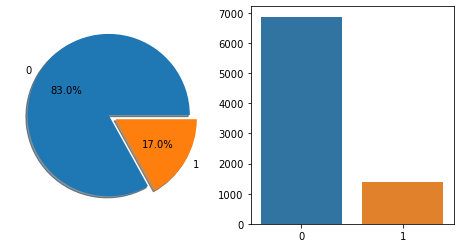

In [9]:
# ===================================================================
# Count of 崩塌
# ===================================================================
f,ax=plt.subplots(1,2,figsize=(8,4))
train_data['崩塌'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = train_data["崩塌"], ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

In [10]:
# Helper functions:
def survived_bar_plot(feature):
    plt.figure(figsize = (6,4))
    sns.barplot(data = train_data , x = feature , y = "崩塌").set_title(f"{feature} Vs 崩塌")
    plt.show()
def survived_table(feature):
    return train_data[[feature, "崩塌"]].groupby([feature], as_index=False).mean().sort_values(by='崩塌', ascending=False).style.background_gradient(low=0.75,high=1)
def survived_hist_plot(feature):
    plt.figure(figsize = (6,4))
    sns.histplot(data = train_data , x = feature , hue = "崩塌",binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs 崩塌")
    plt.show()

In [11]:
#=======================================================================================
# Discovering the correlations:
#=======================================================================================

# sns.set(rc = {'figure.figsize':(10,6)})
# sns.heatmap(train_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

#### Fare:

In [12]:
train_data.地形粗糙度.fillna(train_data.地形粗糙度.dropna().median() , inplace= True)
test_data.地形粗糙度.fillna(test_data.地形粗糙度.dropna().median() , inplace= True)
train_data.水系距.fillna(train_data.水系距.dropna().median() , inplace= True)
test_data.水系距.fillna(test_data.水系距.dropna().median() , inplace= True)
train_data.f_60.fillna(train_data.f_60.dropna().median() , inplace= True)
test_data.f_60.fillna(test_data.f_60.dropna().median() , inplace= True)
train_data.f_85.fillna(train_data.f_85.dropna().median() , inplace= True)
test_data.f_85.fillna(test_data.f_85.dropna().median() , inplace= True)
train_data.f_5.fillna(train_data.f_5.dropna().median() , inplace= True)
test_data.f_5.fillna(test_data.f_5.dropna().median() , inplace= True)
train_data.f_20.fillna(train_data.f_5.dropna().median() , inplace= True)
test_data.f_20.fillna(test_data.f_5.dropna().median() , inplace= True)

In [13]:
print(train_data.isnull().sum())
print("-" * 50)
print(test_data.isnull().sum())

平均坡向       0
平均高程       0
地形粗糙度      0
最小曲率       0
水系距        0
        ... 
f_197    148
f_198      0
f_199      0
f_200    149
崩塌         0
Length: 208, dtype: int64
--------------------------------------------------
平均坡向      0
平均高程      0
地形粗糙度     0
最小曲率      0
水系距       0
         ..
f_196     0
f_197    49
f_198     0
f_199     0
f_200    48
Length: 207, dtype: int64


In [14]:
train_data.head()

,平均坡向,平均高程,地形粗糙度,最小曲率,水系距,斷層距,順向坡指標,f_1,f_2,f_3,...,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,崩塌
0,138.191345,1655.064087,93.277863,-6.547695,1646.903926,14860.0,0.0,4.484632,-3.478605,709.0,...,0.639814,0,1.385669,0.130467,209,1.386477,1.267208e+06,-3.928760,1.828153,0
1,142.642822,964.542664,75.186897,-9.476837,2.255308,7554.0,0.0,5.898102,7.787216,597.0,...,0.517582,1,1.273675,-35.447012,1,0.773422,3.489267e+02,-14.613131,1.009105,0
2,221.524994,727.082153,86.510719,-7.463625,0.000000,3667.0,0.0,6.750004,2.284927,843.0,...,0.531677,1,1.513332,30.406816,42,2.472996,4.385403e+02,-1.900416,0.684592,0
3,204.749802,561.975586,32.229729,-6.683244,35.296943,3562.0,0.0,-12.047764,-4.176922,482.0,...,0.561875,0,1.116824,-12.244655,702,0.599260,3.678790e+02,1.420335,0.488074,0
4,293.591034,2620.492432,164.807343,-10.701438,0.000000,35760.0,0.0,-2.662492,-0.570708,944.0,...,0.540372,1,0.918380,6.757416,833,-0.541268,3.317074e+02,-7.514831,0.668422,0


In [15]:
test_data.head()

,平均坡向,平均高程,地形粗糙度,最小曲率,水系距,斷層距,順向坡指標,f_1,f_2,f_3,...,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200
0,105.478577,327.541229,56.597721,-8.000000,0.000000,7094.0,1.177723e+06,-8.989579,2.788486,522.0,...,1.441976,0.517543,0,1.456796,7.019441,89,-1.922414,689.344670,-5.142200,0.908037
1,15.834167,1975.298340,157.443130,-8.128378,0.000000,34060.0,0.000000e+00,2.344627,-9.577872,516.0,...,0.247279,0.548236,1,0.677517,-32.325511,31,1.820215,281.456321,-9.566616,1.181007
2,258.895264,762.875488,159.135590,-11.922906,31.619956,11750.0,3.894406e+05,5.342430,3.357910,266.0,...,0.888326,0.457628,0,0.931089,22.076788,923,NaN,673.035492,-3.649776,0.671534
3,147.915710,1397.278198,71.952400,-9.057693,0.000000,18640.0,0.000000e+00,-7.052077,-6.246661,385.0,...,1.480112,0.552622,0,0.787467,0.821101,929,0.602270,219.930481,-3.156641,1.214283
4,337.041107,3445.000000,26.774101,-3.191176,687.179630,28150.0,9.341564e-01,3.610681,-15.990754,959.0,...,0.728770,0.544346,0,1.250099,-15.222271,858,1.491841,653.376291,-6.794717,0.969582


<div style="color:#00ADB5;
           display:fill;
           border-radius:5px;
           background-color:#393E46;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            <b> 5 ) Modeling:</b>
        </p>
</div>



In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [17]:
# ==================================================================================
# Preparing Data For Training:
# ==================================================================================

Y_train = train_data["崩塌"]
features = ['平均坡向', '平均高程', '地形粗糙度', '最小曲率', '水系距', '斷層距', '順向坡指標', 'f_60', 'f_85', 'f_5', 'f_20']
# features = list(train_data.columns[:7])
X_train = train_data[features]
# X_train = train_data.drop(labels = ["崩塌"],axis = 1)
Test = test_data[features]
print(f"X_train shape is = {X_train.shape}" )
print(f"Y_train shape is = {Y_train.shape}" )
print(f"Test shape is = {Test.shape}" )

X_train shape is = (8283, 11)
Y_train shape is = (8283,)
Test shape is = (1000, 11)


In [18]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

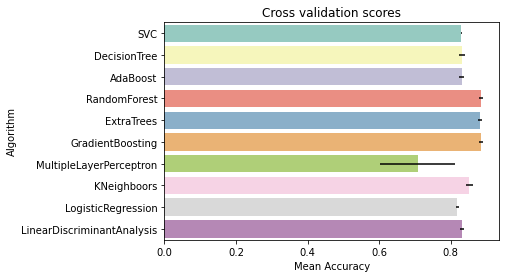

In [19]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [20]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


0.8304952419246749

In [21]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8856689568364189

In [22]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8903782276533626

In [23]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.88760219809677

In [24]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.830496407405465

In [28]:
# ### XGBoost classifier
from xgboost.sklearn import XGBClassifier
XGBC = XGBClassifier()

xgb_param_grid = {'n_estimators' : [860],
    'learning_rate': [0.01,0.02],
    'objective': ['binary:logistic'],
    'subsample': [0.8,1],   #
    'colsample_bytree': [0.8,1],  #
    'min_child_weight': [1],  #
    'max_depth': [8,9], #
    'gamma': [0,0.1,1], #
    'reg_alpha': [0,1], #
    'reg_lambda': [1,10],    #
    'tree_method': ['exact'],
    'scale_pos_weight': [10,16]}

gsXGBC = GridSearchCV(XGBC, param_grid=xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)

gsXGBC.fit(X_train, Y_train)

XGBC_best = gsXGBC.best_estimator_

# Best score
gsXGBC.best_score_

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


0.8810814787620262

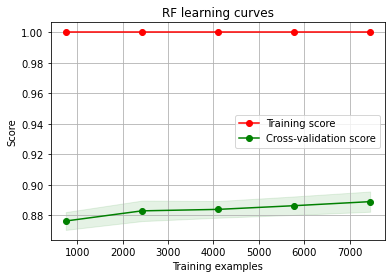

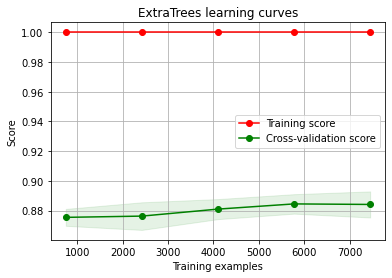

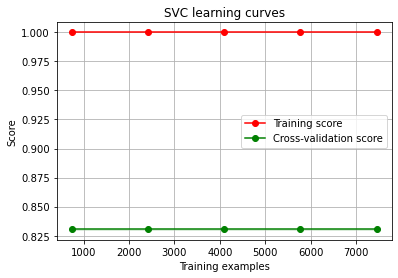

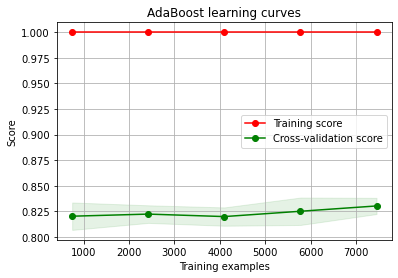

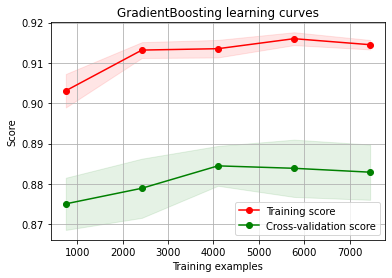

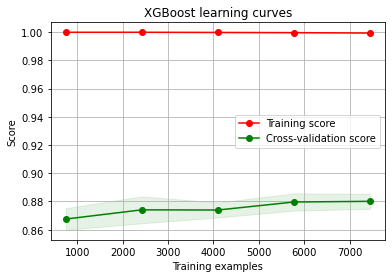

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsXGBC.best_estimator_,"XGBoost learning curves",X_train,Y_train,cv=kfold)

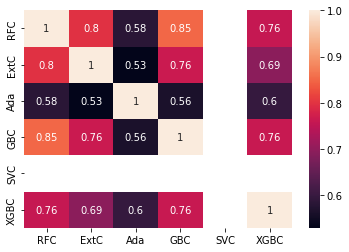

In [30]:
test_RFC = pd.Series(RFC_best.predict(Test), name="RFC")
test_ExtC = pd.Series(ExtC_best.predict(Test), name="ExtC")
test_SVMC = pd.Series(SVMC_best.predict(Test), name="SVC")
test_AdaC = pd.Series(ada_best.predict(Test), name="Ada")
test_GBC = pd.Series(GBC_best.predict(Test), name="GBC")
test_XGBC = pd.Series(XGBC_best.predict(Test), name="XGBC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_RFC,test_ExtC,test_AdaC,test_GBC,test_SVMC,test_XGBC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [31]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best), ('gbc',GBC_best), ('xgbc',XGBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [33]:
pred = pd.read_csv('../input/sample_submission.csv')
test_pred = votingC.predict(Test)
pred['Collapse'] = test_pred
pred.to_csv('ensemble_python_voting.csv', index=None)

In [48]:
print(XGBC_best.objective)

binary:logistic
